# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [39]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

In [7]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [8]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [10]:
# Create a Beautiful Soup Object
html = browser.html
mars_soup = soup(html, 'html.parser')
mars_soup.head

<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<title>Mars Temperature Data</title>
<link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
<link href="css/temp.css" rel="stylesheet" type="text/css"/>
</head>

In [12]:
# Extract all rows of data
data_elements = mars_soup.find_all('tr', class_='data-row')
data_elements

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [13]:
# Create an empty list
list = []

# Loop through the scraped data to create a list of rows
for row in data_elements:
    cell_values = row.find_all('td')
    values = []
    for value in cell_values:
        values.append(value.text)
    list.append(values)

list

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [14]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
temp_df = pd.DataFrame(list, columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])


In [15]:
# Confirm DataFrame was created successfully
temp_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [16]:
# Examine data type of each column
temp_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [17]:
# Change data types for data analysis
temp_df["id"]= pd.to_numeric(temp_df["id"])
temp_df["terrestrial_date"] = pd.to_datetime(temp_df["terrestrial_date"])
temp_df["sol"] = pd.to_numeric(temp_df["sol"])
temp_df["ls"] = pd.to_numeric(temp_df["ls"])
temp_df["month"] = pd.to_numeric(temp_df["month"])
temp_df["min_temp"] = pd.to_numeric(temp_df["min_temp"])
temp_df["pressure"] = pd.to_numeric(temp_df["pressure"])

In [18]:
# Confirm type changes were successful by examining data types again
temp_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [20]:
# 1. How many months are there on Mars?
temp_df['month'].max()

12

In [21]:
# 2. How many sols (Martian days) worth of data are there?
temp_df['sol'].count()

1867

In [22]:
# 3. What is the average minimum temperature by month?
avg_min_temp = temp_df['min_temp'].groupby(temp_df['month']).mean()
avg_min_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

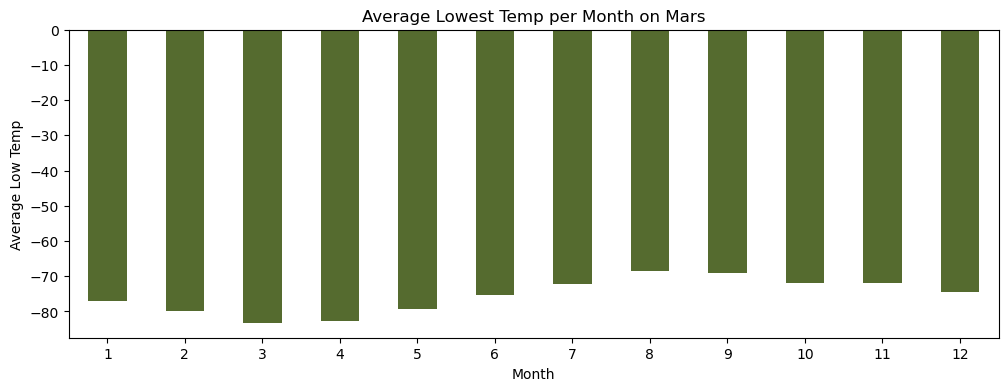

In [35]:
# Plot the average minimum temperature by month
avg_min_temp.plot.bar(rot = 0, color = 'darkolivegreen', figsize=(12,4), fontsize = 10)
plt.ylabel("Average Low Temp")
plt.xlabel("Month")
plt.title("Average Lowest Temp per Month on Mars", fontsize = 12)

plt.show()

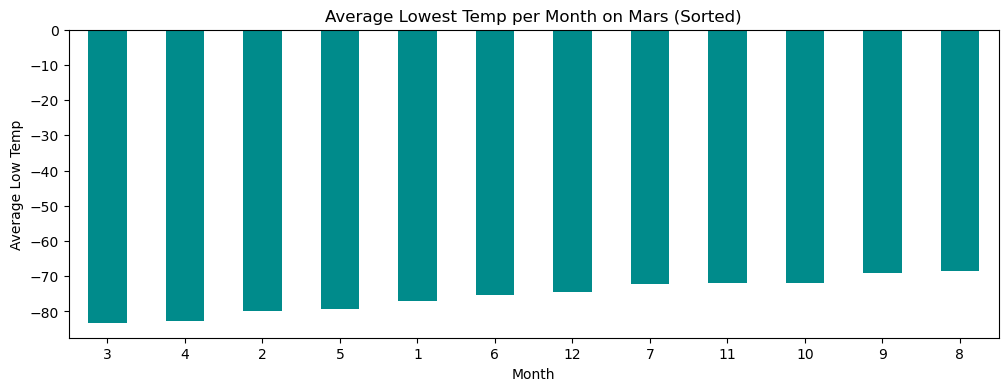

In [36]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
avg_min_temp_sorted = avg_min_temp.sort_values()

avg_min_temp_sorted.plot.bar(rot=0, color='darkcyan', figsize=(12,4), fontsize=10)
plt.ylabel("Average Low Temp")
plt.xlabel("Month")
plt.title("Average Lowest Temp per Month on Mars (Sorted)", fontsize=12)


# Show the plot
plt.show()

In [33]:
# 4. What is the average pressure by month?
avg_pressure_monthly = temp_df["pressure"].groupby(temp_df["month"]).mean()
avg_pressure_monthly

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

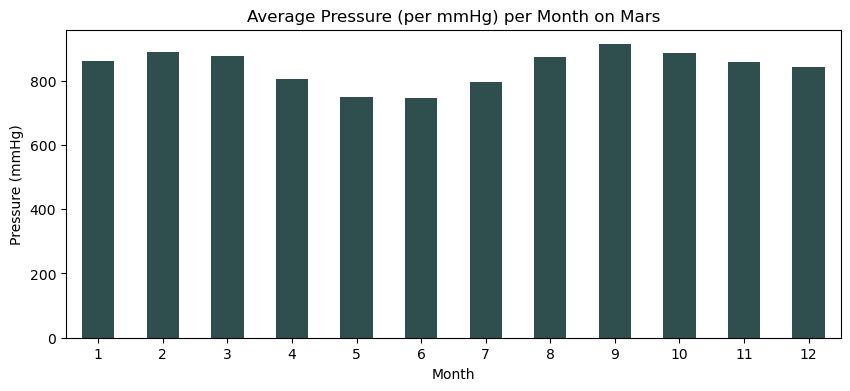

In [34]:
# Plot the average pressure by month
avg_pressure_monthly.plot.bar(rot = 0, color = 'darkslategray', figsize=(10,4), fontsize = 10)
plt.ylabel("Pressure (mmHg)")
plt.xlabel("Month")
plt.title("Average Pressure (per mmHg) per Month on Mars", fontsize = 12)

plt.show()

Text(0.5, 1.0, 'Average Pressure (per mmHg) per Month on Mars')

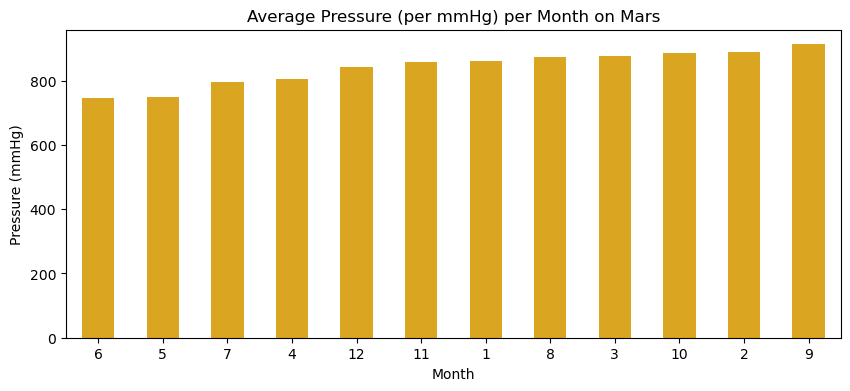

In [37]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
avg_pressure_sorted = avg_pressure_monthly.sort_values()

avg_pressure_sorted.plot.bar(rot = 0, color = 'goldenrod', figsize=(10,4), fontsize = 10)
plt.ylabel("Pressure (mmHg)")
plt.xlabel("Month")
plt.title("Average Pressure (per mmHg) per Month on Mars", fontsize = 12)


685


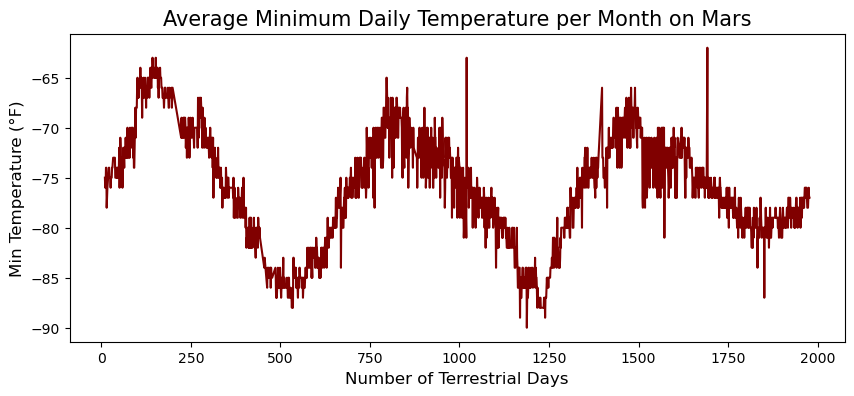

In [42]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
mars_year_days = (datetime.strptime('2015-06-17', "%Y-%m-%d") - 
                  datetime.strptime('2013-08-01', "%Y-%m-%d")).days

print(mars_year_days)

avg_min_temp_per_month = temp_df.groupby('sol')['min_temp'].mean()

# Plot the data
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(avg_min_temp_per_month.index, avg_min_temp_per_month.values, linestyle='-', color = 'maroon')

# Labels and title
ax.set_title("Average Minimum Daily Temperature per Month on Mars", fontsize=15)
ax.set_xlabel("Number of Terrestrial Days", fontsize=12)
ax.set_ylabel("Min Temperature (°F)", fontsize=12)

# Show the plot
plt.show()

#### Minimum Temperature

On observing the average minimum temperature per month on Mars, we can see that it does follow a fairly predictable pattern, similar to Earth. There is around 300 terrestrial days to go from Mars' highest temperature to it's lowest, which then reverses for another 300 days to climb back to it's highest temperature. This cycle stays fairly consistent with some outliers. 

#### Atmospheric Pressure

On observing the atmospheric pressure graphs above, we can see that the month with the lowest average atmospheric pressure is the 6th month on Mars, whereas the 9th month has the highest average atmospheric pressure. However, we can also notice that the atmospheric pressure does follow a general pattern where it increases and decreases in waves with changes of around or less than 50 mmHg per month. 

#### Year Length

On observing the above data, we are able to determine that one year on Mars is equal to 685 terrestrial days. This makes logical sense as Mars is further from the sun than Earth, meaning Mars has a greater distance to travel to make a full rotation around the sun than Earth does. Mars also has less of a gravitational pull to the sun than the Earth does because of this distance, another factor that would contribute to it's solar rotation taking longer than on Earth, helping to confirm the data.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [44]:
# Write the data to a CSV
path = '../mars_data.csv'
temp_df.to_csv(path)

In [22]:
browser.quit()